In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
datetime.datetime.strptime
from pandas import to_datetime
import seaborn as sn
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr, iqr


In [2]:
# Legge il CSV
df = pd.read_csv('customer_supermarket.csv', sep='\t', index_col=0)
# Trasforma il campo "Sale" in un float
df["Sale"] = df["Sale"].str.replace(",", ".").astype(float)
# Trasforma il campo "BasketDate" in un datetime
df["BasketDate"] = pd.to_datetime(df["BasketDate"])

df.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


# DATA SEMANTICS



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.4+ MB


Nel dataset si descrivono le sessioni di acquisto di un certo numero di clienti. Una sessione di acquisto, detta basket (`BasketID`) e si svolge in una data (`BasketDate`), e viene effettuata da un cliente (CustomerID) residente in uno stato (`CustomerCountry`).
Ogni sessione rappresenta una serie di prodotti acquistati da un cliente, e in un record è possibile ritrovare, per il singolo prodotto, l’identificativo (`ProdID`), la descrizione (`ProdDescr`), e  la quantità (`Qtà`). Infine viene riportato il costo unitario del prodotto (`Sale`).

# DISTRIBUTION OF VARIABLES AND STATISTICS


In [10]:
df.describe()

,Sale,CustomerID,Qta
count,471910.000000,406830.000000,471910.000000
mean,4.030945,15287.684160,10.716533
std,83.769380,1713.603074,231.355136
min,-11062.060000,12346.000000,-80995.000000
25%,1.250000,13953.000000,1.000000
50%,2.080000,15152.000000,4.000000
75%,3.750000,16791.000000,12.000000
max,38970.000000,18287.000000,80995.000000


In [11]:
print("Distinct Values in BasketID: \n", df.BasketID.nunique())
print("Distinct Values in BasketDate:\n", df.BasketDate.nunique())
print("Distinct Values in Sale: \n", df.Sale.nunique())
print("Distinct Values in CustomerID: \n", df.CustomerID.nunique())
print("Distinct Values in CustomerCountry: \n", df.CustomerCountry.nunique())
print("Distinct Values in ProdID: \n", df.ProdID.nunique())
print("Distinct Values in ProdDescr: \n", df.ProdDescr.nunique())

Distinct Values in BasketID: 
 24627
Distinct Values in BasketDate:
 22428
Distinct Values in Sale: 
 1146
Distinct Values in CustomerID: 
 4372
Distinct Values in CustomerCountry: 
 38
Distinct Values in ProdID: 
 3953
Distinct Values in ProdDescr: 
 4097


## Date e ore di maggiore traffico nei negozi

## Orari di maggiore frequentazione

Di seguito si mostrano i diagrammi a barre contenenti il numero di `BasketID` per ora del giorno.

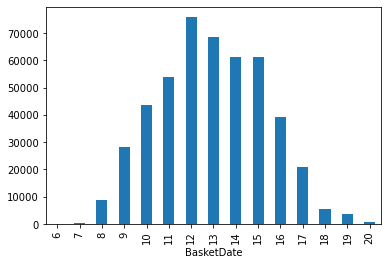

In [12]:
df.groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar")

L'ora del giorno più frequentata sembra essere le 12.

Si restringono le date al 2010 e si osserva come in questo anno l'ora più frequentata siano le 14

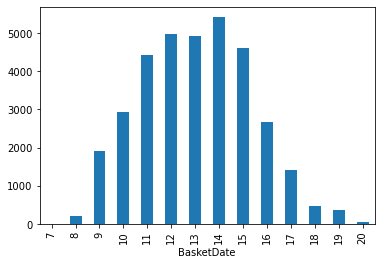

In [32]:
df[df["BasketDate"].dt.year == 2010].groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar")

Mentre nel 2011 l'orario di maggiore frequenza si confermano le 12.

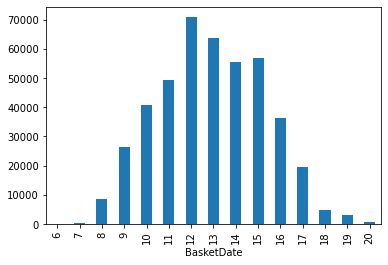

In [33]:
df[df["BasketDate"].dt.year == 2011].groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar")

## Date di maggiore frequentazione

Si mostrano le date di maggiore traffico per gli anni 2010 e 2011

Dato che relativamente al 2010 sono presenti solo 20 record è possibile mostrarli in un unico grafico

20


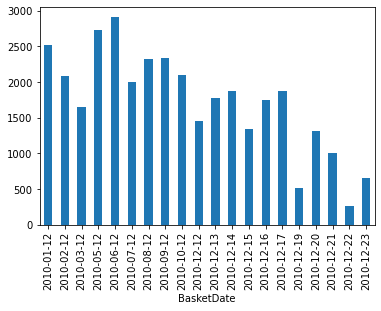

In [9]:
df_2010 = df[df["BasketDate"].dt.year == 2010]

print(df_2010["BasketDate"].dt.date.nunique())

df_2010.groupby(df["BasketDate"].dt.date)["BasketID"].count().plot(kind="bar")

TODO: Grafici per ogni gruppo di mesi del 2011

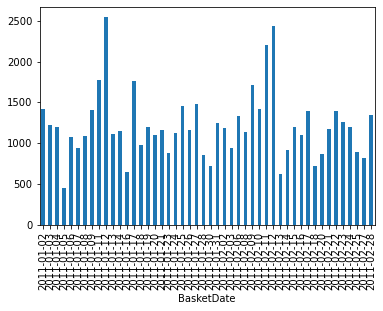

In [10]:
first_three_months = df[(df["BasketDate"].dt.year == 2011) & (df["BasketDate"].dt.month < 3 )]

first_three_months.groupby(df["BasketDate"].dt.date)["BasketID"].count().plot(kind="bar")

## Paesi in cui sono stati effettuati piu acquisti

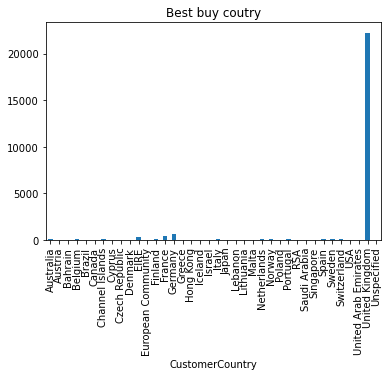

In [11]:
df.groupby('CustomerCountry')["BasketID"].nunique().plot(kind='bar',

title='Best buy coutry')

In [12]:
#verificare a cosa è dovuta la variazione di prezzo
df.groupby(["ProdID",'Qta'])["Sale"].unique()

ProdID        Qta
10002         -3                  [0.0]
               1     [0.85, 1.66, 1.63]
               2     [1.66, 0.85, 1.63]
               3                 [0.85]
               4                 [0.85]
                            ...        
gift_0001_30   1          [25.53, 25.0]
               30                 [0.0]
gift_0001_40   1         [34.04, 33.33]
gift_0001_50   1                [41.67]
m              1                 [2.55]
Name: Sale, Length: 42152, dtype: object

# VARIABLES TRANSFORMATION & GENERATION

## Prezzo nullo

I record con prezzo 0 si considerano missing values, per cui si cerca di recuperare il valore di `Sale` a partire dalla media dei prezzi dello stesso `ProdID`.

In [13]:
df["Sale"] = df.groupby("ProdID")["Sale"].transform(lambda group: group.replace(to_replace=0, method="ffill", value = group.mean()))

## ProdDescr non disponibile

Per rendere più interpretabili certe analisi riteniamo che sia utile recuperare la `ProdDescr` degli elementi che non l'hanno settata. Analogamente al caso precedente, si costruisce una funzione che recupera la descrizione di ogni prodotto dagli altri record.

In [14]:
def replace_first_notna(group: pd.Series, column: str):
    # Indice del primo record con ProdID comune non NaN
    i: int = group.first_valid_index()
    # Se i è None non ci sono ProdDescr valide
    if i is None:
        return group
    # Valore di ProdDescr valido
    value = df.loc[i][column]
    return group.fillna(value)
 
df["ProdDescr"] = df.groupby("ProdID")["ProdDescr"].transform(lambda x: replace_first_notna(x, "ProdDescr"))

# ASSESSING DATA QUALITY (MISSING VALUES, OUTLIERS)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 52.4+ MB


Si osserva che le uniche quantità settate a NaN sono `CustomerID` e le `ProdDescr`. I record che non hanno `CustomerID` non portano informazioni riguardo al profilo del cliente, mentre la `ProdDescr` può essere recuperata dai record con lo stesso `ProdID`.

In [16]:
df = df[~(df["CustomerID"].isnull())]

## Outliers nella quantità (`Qta`)

La distribuzione della quantità segue la seguente distribuzione:

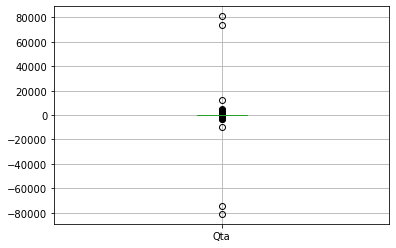

In [3]:
boxplot = df.boxplot(column=['Qta'])

In [4]:
df[df["Qta"]<20000].describe()

,Sale,CustomerID,Qta
count,471908.000000,406828.000000,471908.000000
mean,4.030955,15287.688544,10.387679
std,83.769558,1713.600118,167.210681
min,-11062.060000,12346.000000,-80995.000000
25%,1.250000,13953.000000,1.000000
50%,2.080000,15152.000000,4.000000
75%,3.750000,16791.000000,12.000000
max,38970.000000,18287.000000,12540.000000


Eliminiamo quindi i record la cui distanza interquartile è troppo alta:

In [18]:
def drop_iqr(column, treshold=1.5):
    global df
    data = df[column]
    Q1 = data.quantile(q = 0.25)
    Q3 = data.quantile(q = 0.75)
    IQR = data.apply(iqr)
    #only keep rows in dataframe that have values within treshold*IQR of Q1 and Q3
    df = df[~((df[column] < (Q1-treshold*IQR)) | (df[column] > (Q3+treshold*IQR)))]
drop_iqr("Qta")

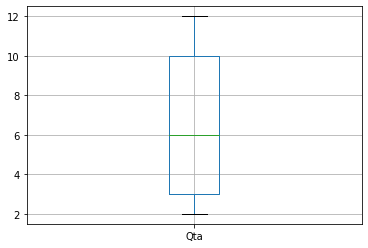

In [19]:
df.boxplot(column=["Qta"])

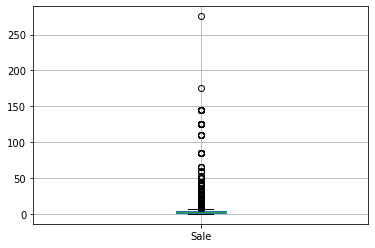

In [20]:
df.boxplot(column=["Sale"])

In [21]:
df[df["Sale"]>200]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
106609,545336,2011-01-03 16:53:00,275.6,12428.0,Finland,M,Manual,2


Boxplot raggruppato per paese

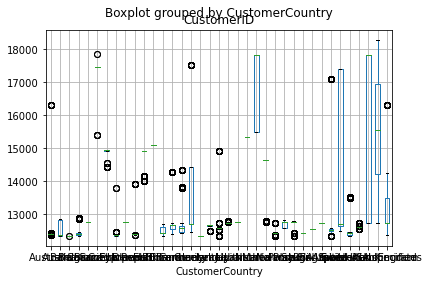

In [36]:
df.boxplot(column=["CustomerID"], by="CustomerCountry")

# PAIRWISE CORRELATION & ELIMINATION OF REDUNTANT VARIABLES

Si discretizzano le variabili non numeriche all'interno del dataset:

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy = df.copy()
for column in {"BasketID", "BasketDate", "CustomerCountry", "ProdID", "ProdDescr"}:
    df_copy[column] = le.fit_transform(df_copy[column].astype(str))

Si definisce la matrice di correlazione tra gli attributi:

In [28]:
df_copy.corr().style.background_gradient(cmap='coolwarm')

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
BasketID,1.000000,0.643295,-0.040810,0.004229,0.002712,0.096869,0.021858,-0.012463
BasketDate,0.643295,1.000000,-0.024189,-0.002167,-0.012139,0.060929,0.015474,-0.001488
Sale,-0.040810,-0.024189,1.000000,-0.055157,-0.081354,0.095727,0.007358,-0.302619
CustomerID,0.004229,-0.002167,-0.055157,1.000000,0.397686,0.006324,0.000121,-0.122757
CustomerCountry,0.002712,-0.012139,-0.081354,0.397686,1.000000,0.011998,-0.007672,-0.122236
ProdID,0.096869,0.060929,0.095727,0.006324,0.011998,1.000000,0.001714,-0.028114
ProdDescr,0.021858,0.015474,0.007358,0.000121,-0.007672,0.001714,1.000000,0.001835
Qta,-0.012463,-0.001488,-0.302619,-0.122757,-0.122236,-0.028114,0.001835,1.000000


Dato che non si osservano correlazioni notevoli (maggiori dell'80%) non è il caso di eliminare attributi ridondanti.

In [29]:
df.to_csv("./preprocessed.csv")

# DATA PREPARATION

Costruzione di attributi che caratterizzano il comportamento di un utente.

Si caricano i dati preprocessati, considerando per ora solo quelli con `CustomerID` non nullo:

In [25]:
df = pd.read_csv("./preprocessed.csv", index_col=0)
df = df[~(df["CustomerID"].isnull())]
df["BasketDate"] = pd.to_datetime(df["BasketDate"])
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541904,581587,2011-09-12 12:50:00,0.85,12680.0,France,22613,PACK OF 20 SPACEBOY NAPKINS,12
541905,581587,2011-09-12 12:50:00,2.10,12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,2011-09-12 12:50:00,4.15,12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,2011-09-12 12:50:00,4.15,12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4


In [26]:
from indicators import customer_features

customer_indicators = df.groupby("CustomerID").apply(customer_features)
customer_indicators = pd.DataFrame(customer_indicators.values.tolist(), index=customer_indicators.index)
customer_indicators

,I,Iu,spending,Imax,avg_bought,baskets,E
CustomerID,,,,,,,
12347.0,164.571429,12.285714,416.905714,330,3.137986,7,6.217788
12348.0,6.000000,1.000000,240.000000,6,40.000000,1,0.000000
12349.0,465.000000,63.000000,1233.910000,465,3.714603,1,5.786721
12350.0,172.000000,15.000000,274.000000,172,1.630000,1,3.891479
12352.0,68.857143,7.857143,214.991429,103,5.148158,7,5.454556
...,...,...,...,...,...,...,...
18280.0,45.000000,10.000000,180.600000,45,4.765000,1,3.207542
18281.0,52.000000,5.000000,46.920000,52,1.092000,1,2.281445
18282.0,26.500000,4.500000,69.315000,28,4.066667,2,2.962478


In [27]:
customer_indicators.describe()

,I,Iu,spending,Imax,avg_bought,baskets,E
count,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000,4150.000000
mean,101.228624,13.745575,232.548074,146.372048,3.419600,3.940000,4.363661
std,86.226957,12.247100,203.760553,127.699879,4.274995,6.699954,1.643364
min,2.000000,0.200000,0.840000,2.000000,0.347500,1.000000,0.000000
25%,47.000000,6.000000,108.991250,61.000000,2.190041,1.000000,3.321256
50%,82.000000,10.732143,184.641771,115.000000,2.959688,2.000000,4.454893
75%,131.661765,17.666667,299.090536,194.000000,3.878626,4.000000,5.546482
max,1507.000000,202.000000,3343.190000,1507.000000,145.000000,191.000000,9.891737


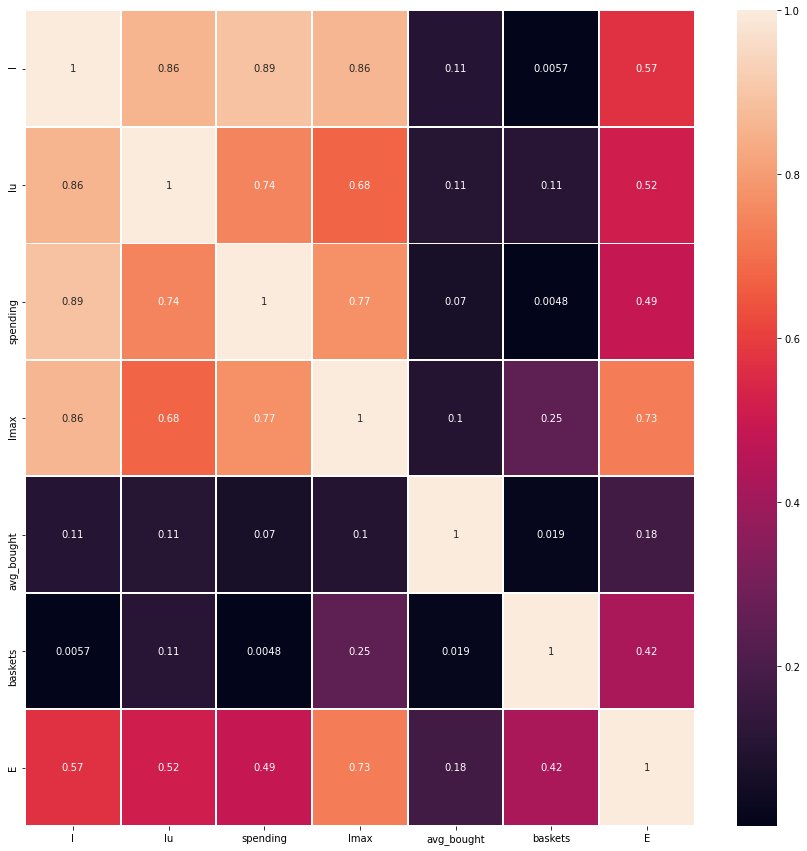

,I,Iu,spending,Imax,avg_bought,baskets,E
I,1.000000,0.857035,0.891570,0.860799,0.105598,0.005706,0.569257
Iu,0.857035,1.000000,0.743712,0.676608,0.108110,0.112878,0.516087
spending,0.891570,0.743712,1.000000,0.774020,0.069966,0.004818,0.489669
Imax,0.860799,0.676608,0.774020,1.000000,0.099773,0.248725,0.731077
avg_bought,0.105598,0.108110,0.069966,0.099773,1.000000,0.018727,0.178723
baskets,0.005706,0.112878,0.004818,0.248725,0.018727,1.000000,0.421316
E,0.569257,0.516087,0.489669,0.731077,0.178723,0.421316,1.000000


In [28]:
customer_indicators.corr()


fig, ax = plt.subplots(figsize=(15,15))         #

sn.heatmap(customer_indicators.corr().abs(), annot=True, linewidths=.9, ax=ax)
plt.savefig('./correlationMatrixImage.png')
plt.show()

customer_indicators.corr().abs().style.background_gradient(cmap='coolwarm')



In [29]:
customer_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4150 entries, 12347.0 to 18287.0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   I           4150 non-null   float64
 1   Iu          4150 non-null   float64
 2   spending    4150 non-null   float64
 3   Imax        4150 non-null   int64  
 4   avg_bought  4150 non-null   float64
 5   baskets     4150 non-null   int64  
 6   E           4150 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 259.4 KB


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler1 = MinMaxScaler()
scaler2= StandardScaler()

customer_indicators=customer_indicators.fillna(0)

customer_indicators[customer_indicators.columns]=scaler1.fit_transform(customer_indicators)




In [31]:
customer_indicators

,I,Iu,spending,Imax,avg_bought,baskets,E
CustomerID,,,,,,,
12347.0,0.108021,0.059890,0.124483,0.217940,0.019291,0.031579,0.628584
12348.0,0.002658,0.003964,0.071554,0.002658,0.274122,0.000000,0.000000
12349.0,0.307641,0.311199,0.368923,0.307641,0.023277,0.000000,0.585006
12350.0,0.112957,0.073340,0.081727,0.112957,0.008866,0.000000,0.393407
12352.0,0.044423,0.037944,0.064072,0.067110,0.033188,0.031579,0.551425
...,...,...,...,...,...,...,...
18280.0,0.028571,0.048563,0.053783,0.028571,0.030539,0.000000,0.324265
18281.0,0.033223,0.023786,0.013787,0.033223,0.005147,0.000000,0.230642
18282.0,0.016279,0.021308,0.020487,0.017276,0.025711,0.005263,0.299490


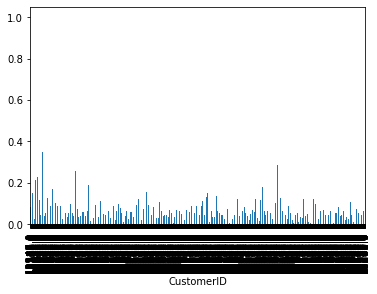

In [32]:
#customer_indicators["spending"].plot.bar()

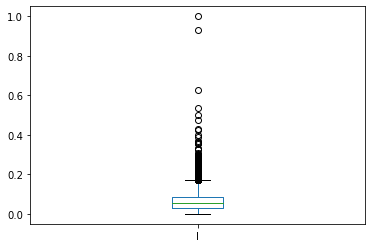

In [33]:
customer_indicators["I"].plot.box()

In [34]:
customer_indicators=customer_indicators[customer_indicators["I"]<0.8]

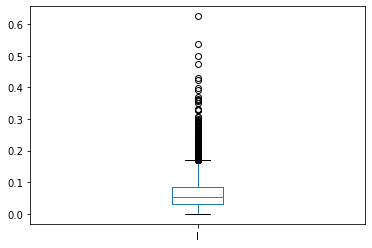

In [35]:
customer_indicators["I"].plot.box()

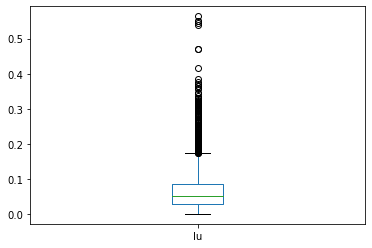

In [36]:
customer_indicators["Iu"].plot.box()

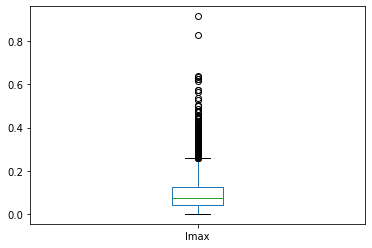

In [37]:
customer_indicators["Imax"].plot.box()

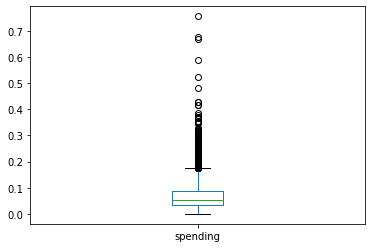

In [38]:
customer_indicators["spending"].plot.box()

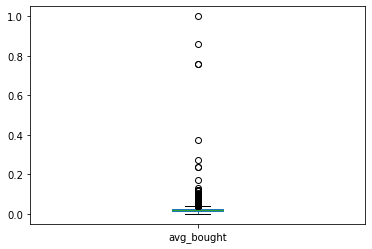

In [39]:
customer_indicators["avg_bought"].plot.box()

In [40]:
customer_indicators=customer_indicators[customer_indicators["avg_bought"]<0.6]

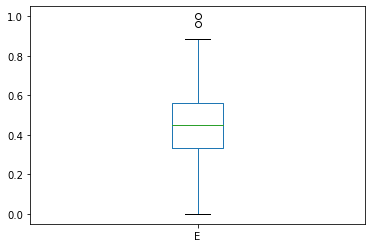

In [41]:
customer_indicators["E"].plot.box()

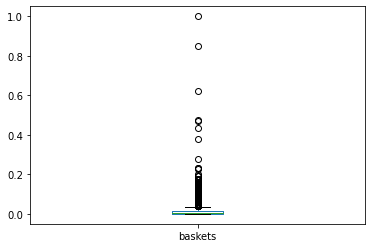

In [42]:
customer_indicators["baskets"].plot.box()

In [43]:
customer_indicators

,I,Iu,spending,Imax,avg_bought,baskets,E
CustomerID,,,,,,,
12347.0,0.108021,0.059890,0.124483,0.217940,0.019291,0.031579,0.628584
12348.0,0.002658,0.003964,0.071554,0.002658,0.274122,0.000000,0.000000
12349.0,0.307641,0.311199,0.368923,0.307641,0.023277,0.000000,0.585006
12350.0,0.112957,0.073340,0.081727,0.112957,0.008866,0.000000,0.393407
12352.0,0.044423,0.037944,0.064072,0.067110,0.033188,0.031579,0.551425
...,...,...,...,...,...,...,...
18280.0,0.028571,0.048563,0.053783,0.028571,0.030539,0.000000,0.324265
18281.0,0.033223,0.023786,0.013787,0.033223,0.005147,0.000000,0.230642
18282.0,0.016279,0.021308,0.020487,0.017276,0.025711,0.005263,0.299490


In [44]:

#svm GIA
#bayes MATTEO
#random forest MATTEO
#knn GIA

In [45]:
#prendo dataset per clustering
X_KMeans=customer_indicators.copy()
X_DBScan=customer_indicators.copy()


In [46]:
X_KMeans

,I,Iu,spending,Imax,avg_bought,baskets,E
CustomerID,,,,,,,
12347.0,0.108021,0.059890,0.124483,0.217940,0.019291,0.031579,0.628584
12348.0,0.002658,0.003964,0.071554,0.002658,0.274122,0.000000,0.000000
12349.0,0.307641,0.311199,0.368923,0.307641,0.023277,0.000000,0.585006
12350.0,0.112957,0.073340,0.081727,0.112957,0.008866,0.000000,0.393407
12352.0,0.044423,0.037944,0.064072,0.067110,0.033188,0.031579,0.551425
...,...,...,...,...,...,...,...
18280.0,0.028571,0.048563,0.053783,0.028571,0.030539,0.000000,0.324265
18281.0,0.033223,0.023786,0.013787,0.033223,0.005147,0.000000,0.230642
18282.0,0.016279,0.021308,0.020487,0.017276,0.025711,0.005263,0.299490


In [47]:
#riporto dataset alla forma originale per i plot
customer_indicators[customer_indicators.columns]=scaler1.inverse_transform(customer_indicators[customer_indicators.columns])

Preprocessing Dati per clustering

# K-means 

# Subtask 1.1: identificazione del valore K

In [48]:
X_KMeans

,I,Iu,spending,Imax,avg_bought,baskets,E
CustomerID,,,,,,,
12347.0,0.108021,0.059890,0.124483,0.217940,0.019291,0.031579,0.628584
12348.0,0.002658,0.003964,0.071554,0.002658,0.274122,0.000000,0.000000
12349.0,0.307641,0.311199,0.368923,0.307641,0.023277,0.000000,0.585006
12350.0,0.112957,0.073340,0.081727,0.112957,0.008866,0.000000,0.393407
12352.0,0.044423,0.037944,0.064072,0.067110,0.033188,0.031579,0.551425
...,...,...,...,...,...,...,...
18280.0,0.028571,0.048563,0.053783,0.028571,0.030539,0.000000,0.324265
18281.0,0.033223,0.023786,0.013787,0.033223,0.005147,0.000000,0.230642
18282.0,0.016279,0.021308,0.020487,0.017276,0.025711,0.005263,0.299490


K: 2
SSE 94.94846609325931
Silhouette 0.42682196566310493
Separation 0.838014272731308 

K: 3
SSE 66.82673219586373
Silhouette 0.37496972442546384
Separation 0.9356195354459987 

K: 4
SSE 52.37925821183809
Silhouette 0.3571229011287887
Separation 0.9660064923316221 

K: 5
SSE 44.1881828736472
Silhouette 0.33287753432222605
Separation 0.9526116018058481 

K: 10
SSE 26.864908576325792
Silhouette 0.28657971563596335
Separation 0.9721339837377476 

K: 15
SSE 19.99009609186923
Silhouette 0.26295748903402194
Separation 1.0698743636709602 

K: 20
SSE 16.66228937850525
Silhouette 0.26036833755582683
Separation 1.0793775981134057 



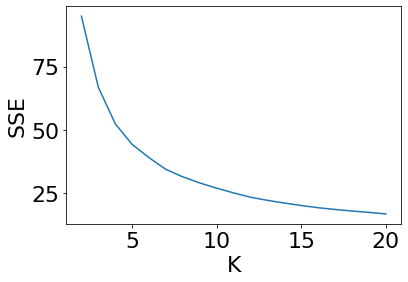

[94.94846609325931, 66.82673219586373, 52.37925821183809, 44.1881828736472, 38.94105103264814, 34.27750539081585, 31.33494321348799, 28.924043852870724, 26.864908576325792, 24.982975906683066, 23.27141828133337, 22.045078638177305, 20.97557109689493, 19.99009609186923, 19.11788780983874, 18.43164178052313, 17.80786324198864, 17.26385504981812, 16.66228937850525]


In [49]:
from sklearn.cluster import KMeans
from sklearn import metrics
sse_list = list()
max_k = 20
start_k=2
for k in range(start_k, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=30, max_iter=100)
    kmeans.fit(X_KMeans)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
    if((k%5==0) or k<5):
        print("K: "+str(k))
        print('SSE %s' % kmeans.inertia_)
        print('Silhouette %s' % metrics.silhouette_score(X_KMeans, kmeans.labels_))
        print('Separation %s \n' % metrics.davies_bouldin_score(X_KMeans, kmeans.labels_))
        

plt.plot(range(start_k, max_k + 1), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()


print(sse_list)

guardando la curva dell'SSE al variare di K, vediamo che il valore smette di decrescere rapidamente dopo K>5.
Si sceglie però K=3, perche negli esperimenti fatti con K=4,5 si ottenevano centroidi quasi del tutto sovrapposti, che non riportavano quindi alcuna informazione di classificazione, cosa che non accade invece con K=3.   

In [51]:
kmeans = KMeans(n_clusters=3, n_init=30, max_iter=100)
kmeans.fit(X_KMeans)
    

print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % metrics.silhouette_score(X_KMeans, kmeans.labels_))
print('Separation %s \n' % metrics.davies_bouldin_score(X_KMeans, kmeans.labels_))

SSE 66.82864887390177
Silhouette 0.3752733150987698
Separation 0.9355704711121632 



# Subtask 1.2: descrizione dei cluster ottenuti

In [52]:
customer_indicators.corr().abs().style.background_gradient(cmap='coolwarm')

,I,Iu,spending,Imax,avg_bought,baskets,E
I,1.000000,0.839590,0.879728,0.856126,0.162513,0.003049,0.591482
Iu,0.839590,1.000000,0.715513,0.654490,0.172087,0.116391,0.530560
spending,0.879728,0.715513,1.000000,0.761963,0.118845,0.008678,0.507745
Imax,0.856126,0.654490,0.761963,1.000000,0.145442,0.257241,0.741677
avg_bought,0.162513,0.172087,0.118845,0.145442,1.000000,0.014153,0.219833
baskets,0.003049,0.116391,0.008678,0.257241,0.014153,1.000000,0.422429
E,0.591482,0.530560,0.507745,0.741677,0.219833,0.422429,1.000000


In [53]:
#centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers = (kmeans.cluster_centers_)
centers = scaler1.inverse_transform(kmeans.cluster_centers_)

#I	Iu	spending	Imax	avg_bought	baskets	E


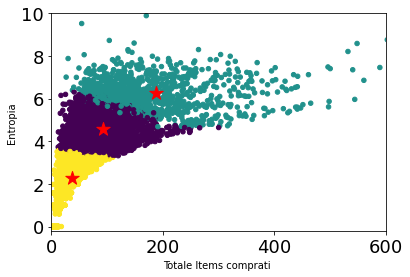

In [56]:
plt.scatter(customer_indicators['I'], customer_indicators['E'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:,6], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0.2, 600)
plt.ylim(-0.2,10)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Entropia')
plt.show()

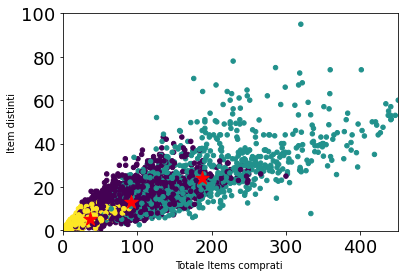

In [60]:
plt.scatter(customer_indicators['I'], customer_indicators['Iu'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0.2, 450)
plt.ylim(-0.2,100)
plt.xlabel('Totale Items comprati ')
plt.ylabel('Item distinti')
plt.show()

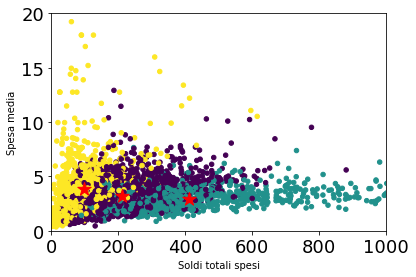

In [62]:
#I	Iu	spending	Imax	avg_bought	baskets	E
plt.scatter(customer_indicators['spending'], customer_indicators['avg_bought'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 2], centers[:,4], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0.2, 1000)
plt.ylim(-0.01,20)
plt.xlabel('Soldi totali spesi')
plt.ylabel('Spesa media')
plt.show()

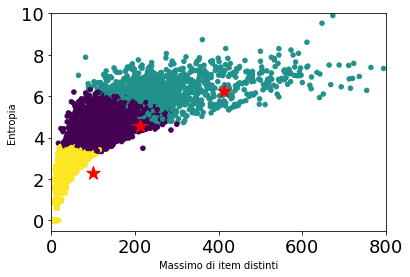

In [68]:
#I	Iu	spending	Imax	avg_bought	baskets	E
plt.scatter(customer_indicators['Imax'], customer_indicators['E'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 2], centers[:, 6], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0.2, 800)
plt.ylim(-0.5,10)
plt.xlabel('Massimo di item distinti')
plt.ylabel('Entropia')
plt.show()

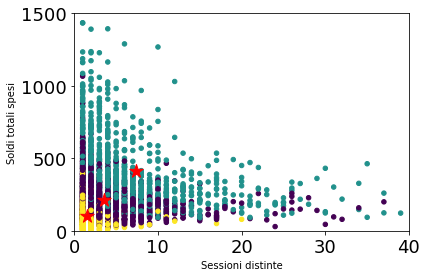

In [74]:
plt.scatter(customer_indicators['baskets'], customer_indicators['spending'],s=20,c=kmeans.labels_)
plt.scatter(centers[:, 5], centers[:, 2], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0.01, 40)
plt.ylim(-0.01,1500)
plt.xlabel('Sessioni distinte')
plt.ylabel('Soldi totali spesi')
plt.show()

In [76]:
centers

array([[ 92.21225378,  12.9776429 , 212.30140376, 123.78015952,
          3.19338054,   3.5109671 ,   4.55419434],
       [187.18838417,  24.34719352, 411.78447859, 304.08912831,
          2.91364442,   7.40058766,   6.26943235],
       [ 36.77409989,   5.16248754,  99.24543432,  40.94986571,
          3.86234422,   1.56311549,   2.28969396]])

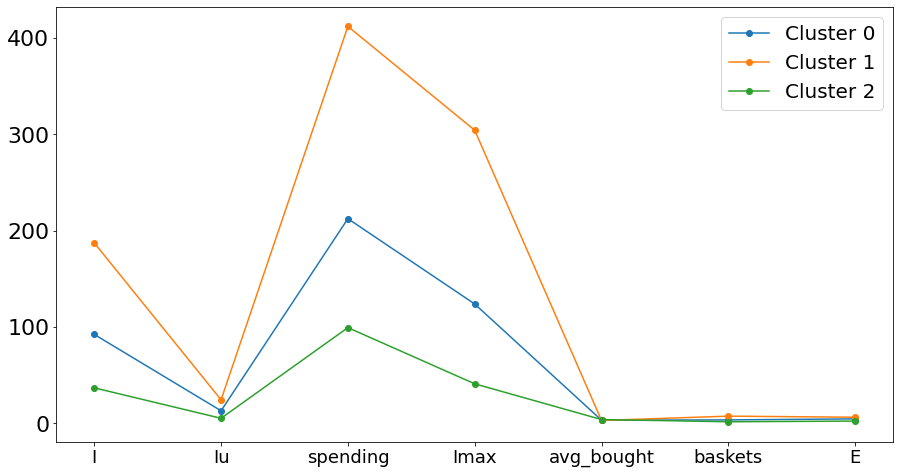

In [78]:
plt.figure(figsize=(15, 8))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(customer_indicators.columns)), customer_indicators.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()

Zoom nella parte bassa del grafico

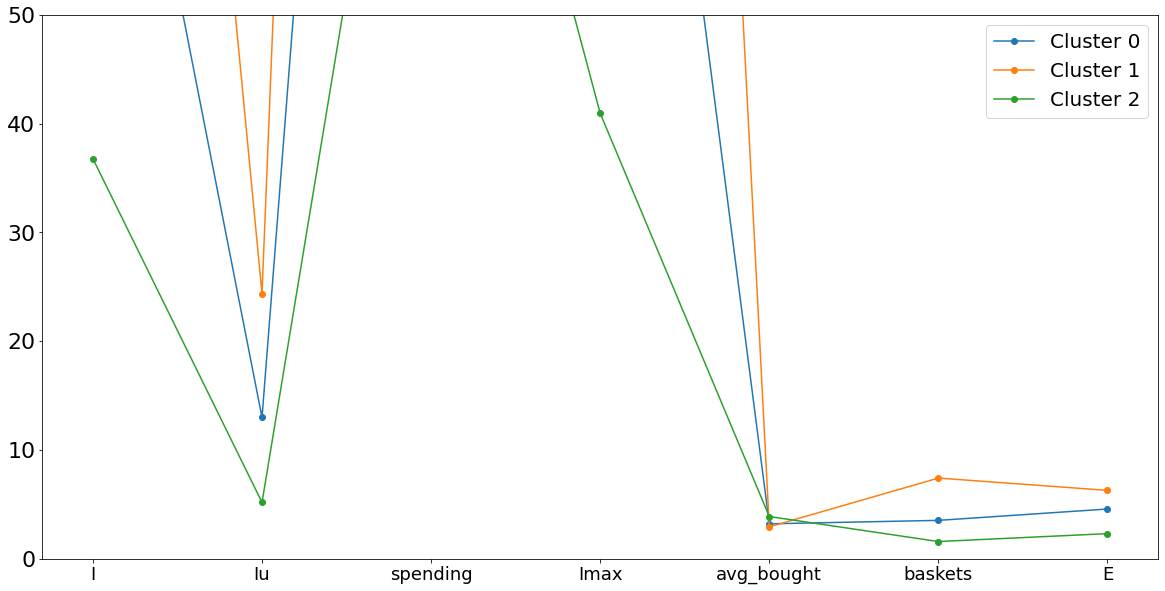

In [79]:
plt.figure(figsize=(20, 10))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(customer_indicators.columns)), customer_indicators.columns, fontsize=18)
plt.legend(fontsize=20)
plt.ylim(0,50)
plt.show()

# Density based clustering

# SubTask 3.1: study of clustering parameters

In [80]:
X_DBScan

,I,Iu,spending,Imax,avg_bought,baskets,E
CustomerID,,,,,,,
12347.0,0.108021,0.059890,0.124483,0.217940,0.019291,0.031579,0.628584
12348.0,0.002658,0.003964,0.071554,0.002658,0.274122,0.000000,0.000000
12349.0,0.307641,0.311199,0.368923,0.307641,0.023277,0.000000,0.585006
12350.0,0.112957,0.073340,0.081727,0.112957,0.008866,0.000000,0.393407
12352.0,0.044423,0.037944,0.064072,0.067110,0.033188,0.031579,0.551425
...,...,...,...,...,...,...,...
18280.0,0.028571,0.048563,0.053783,0.028571,0.030539,0.000000,0.324265
18281.0,0.033223,0.023786,0.013787,0.033223,0.005147,0.000000,0.230642
18282.0,0.016279,0.021308,0.020487,0.017276,0.025711,0.005263,0.299490


In [81]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

dist = pdist(X_DBScan, 'euclidean') 
dist = squareform(dist) 
dist.shape

(4144, 4144)

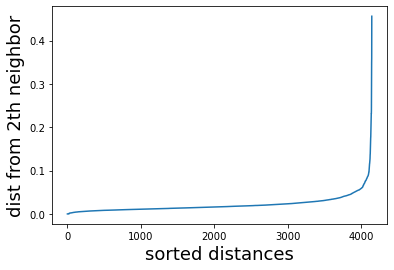

K = 2 
k-dist del 4000-esimo punto 0.05900574192326568: 
k-dist del 3000-esimo punto 0.023354557933182463: 


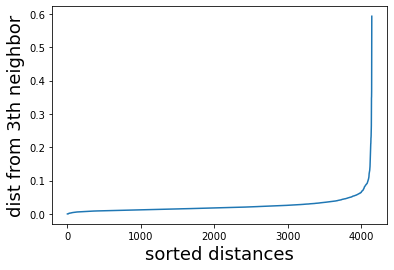

K = 3 
k-dist del 4000-esimo punto 0.06479384380576535: 
k-dist del 3000-esimo punto 0.02588331495683801: 


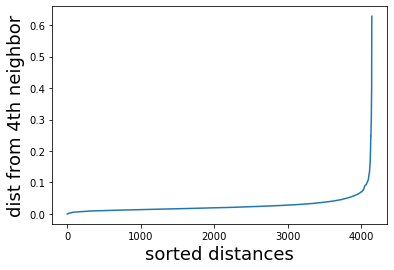

K = 4 
k-dist del 4000-esimo punto 0.06999764541790579: 
k-dist del 3000-esimo punto 0.027985657695470373: 


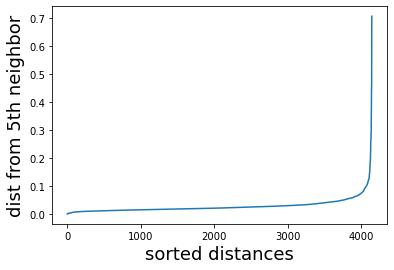

K = 5 
k-dist del 4000-esimo punto 0.07444863123485393: 
k-dist del 3000-esimo punto 0.02964176115372422: 


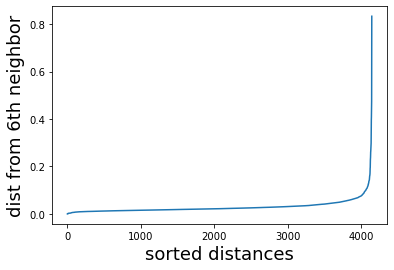

K = 6 
k-dist del 4000-esimo punto 0.07652118773928145: 
k-dist del 3000-esimo punto 0.030992158571137487: 


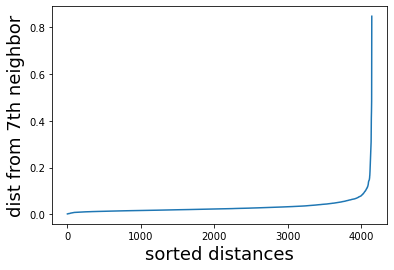

K = 7 
k-dist del 4000-esimo punto 0.08003578251717183: 
k-dist del 3000-esimo punto 0.032274149214512084: 


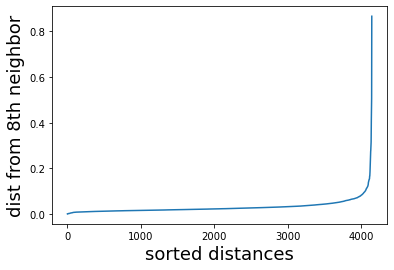

K = 8 
k-dist del 4000-esimo punto 0.08361449333781569: 
k-dist del 3000-esimo punto 0.033259050521581686: 


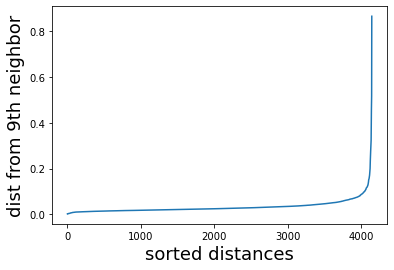

K = 9 
k-dist del 4000-esimo punto 0.08674752768161915: 
k-dist del 3000-esimo punto 0.03428023643499472: 


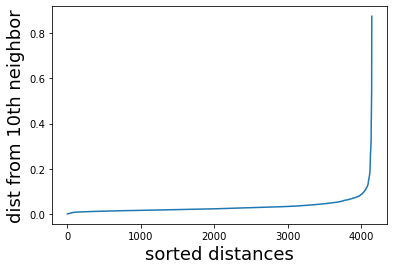

K = 10 
k-dist del 4000-esimo punto 0.08850131792039144: 
k-dist del 3000-esimo punto 0.0352372019988417: 


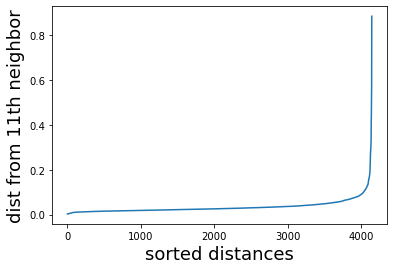

K = 11 
k-dist del 4000-esimo punto 0.09070954319979717: 
k-dist del 3000-esimo punto 0.0358950371005426: 


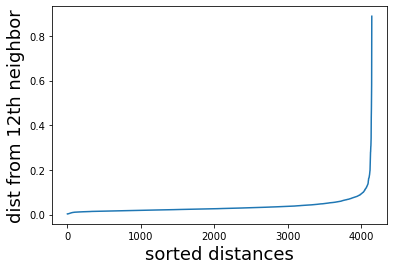

K = 12 
k-dist del 4000-esimo punto 0.09268341854829448: 
k-dist del 3000-esimo punto 0.03660983109809758: 


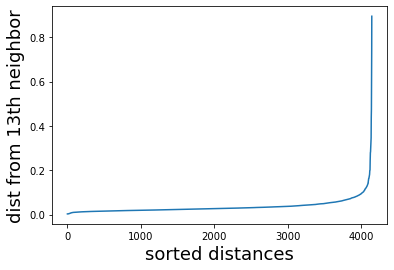

K = 13 
k-dist del 4000-esimo punto 0.09449779817652691: 
k-dist del 3000-esimo punto 0.037292492488715454: 


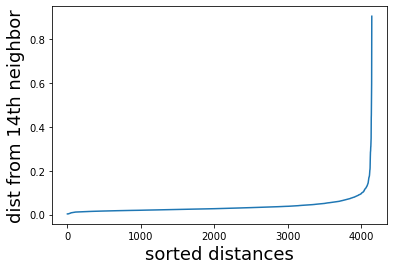

K = 14 
k-dist del 4000-esimo punto 0.09622004384448449: 
k-dist del 3000-esimo punto 0.03795998564407215: 


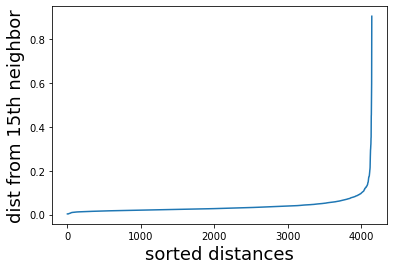

K = 15 
k-dist del 4000-esimo punto 0.09860203988469604: 
k-dist del 3000-esimo punto 0.038540093771172235: 


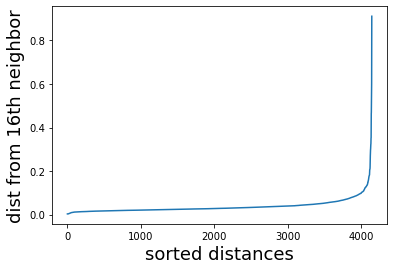

K = 16 
k-dist del 4000-esimo punto 0.10021909641008692: 
k-dist del 3000-esimo punto 0.03938412633823297: 


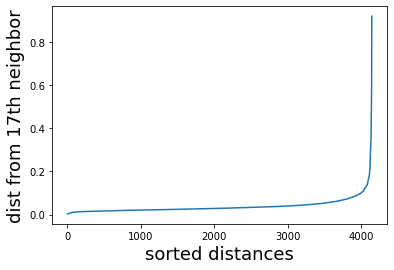

K = 17 
k-dist del 4000-esimo punto 0.10066477524027564: 
k-dist del 3000-esimo punto 0.03999798902936265: 


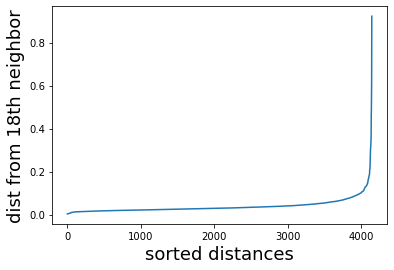

K = 18 
k-dist del 4000-esimo punto 0.10217233263775238: 
k-dist del 3000-esimo punto 0.04066481606465455: 


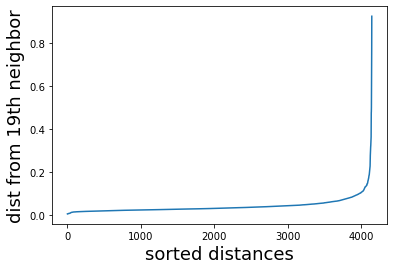

K = 19 
k-dist del 4000-esimo punto 0.10400887409538984: 
k-dist del 3000-esimo punto 0.04120995573493796: 


In [82]:
for k in range(2,20):

    
    kth_distances = list()
    for d in dist:
        index_kth_distance = np.argsort(d)[k] #indice della distanza che ordinata è in posizione k
        kth_distances.append(d[index_kth_distance])

        
    kth_distances=sorted(kth_distances)

    
    plt.plot(range(0, len(kth_distances)), kth_distances)
    plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
    plt.xlabel('sorted distances', fontsize=18)
    plt.show()
    
    print("K = %d " % k)
    print("k-dist del 4000-esimo punto %s: " % kth_distances[4000])
    print("k-dist del 3000-esimo punto %s: " % kth_distances[3000])

# Subtask 3.2: cluster analysys

In [84]:
dbscan = DBSCAN(eps=0.08, min_samples=8)
dbscan.fit(X_DBScan)

print('Silhouette %s' % metrics.silhouette_score(X_DBScan, dbscan.labels_))

Silhouette 0.5820913975204165


In [85]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0], dtype=int64), array([  79, 4065], dtype=int64))

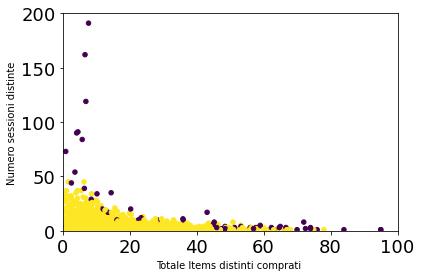

In [90]:
plt.scatter(customer_indicators['Iu'],customer_indicators['baskets'],s=20,c=dbscan.labels_)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0.01, 100)
plt.ylim(-0.01,200)
plt.xlabel('Totale Items distinti comprati ')
plt.ylabel('Numero sessioni distinte')
plt.show()

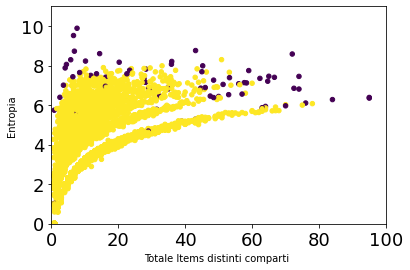

In [92]:
plt.scatter(customer_indicators['Iu'], customer_indicators['E'],s=20,c=dbscan.labels_)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0.01, 100)
plt.ylim(-0.01,11)
plt.xlabel('Totale Items distinti comparti ')
plt.ylabel('Entropia')
plt.show()

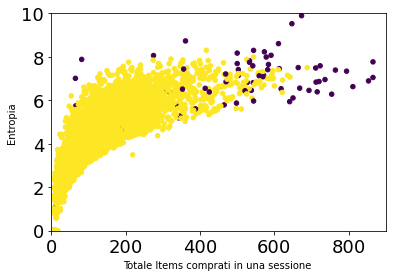

In [96]:
plt.scatter(customer_indicators['Imax'], customer_indicators['E'],s=20,c=dbscan.labels_)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlim(-0.01,500)
plt.ylim(-0.01,10)
plt.xlabel('Totale Items comprati in una sessione ')
plt.ylabel('Entropia')
plt.show()

la dimensione dello spazio elevata e l'alta densità dei punti fa si che si genera quasi un solo cluster